In [ ]:
#| default_exp total_sleep_demo

In [ ]:
#| export
import json
import requests

def get_daily_sleep(
    start_date: str, # end date
    end_date: str,# start date
    token: str, #Oura's personal access token 
) -> dict: # Returns the data JSOn of the response
    url = 'https://api.ouraring.com/v2/usercollection/sleep' 
    params={ 
        'start_date': start_date, 
        'end_date':end_date 
    }
    headers = { 
      'Authorization': f'Bearer {token}' 
    }
    response = requests.request('GET',url,headers=headers,params=params)
    return json.loads(response.text)['data']

In [ ]:
import os

# Plug the OURA_TOKEN yourself :) 
daily_sleep_data = get_daily_sleep(
    start_date='2022-09-01',
    end_date='2022-09-16',
    token=os.environ["OURA_TOKEN"]
)

In [ ]:
# Sample point.
str(daily_sleep_data[0])[:500]

"{'average_breath': 16.125, 'average_heart_rate': 64.25, 'average_hrv': 33, 'awake_time': 2070, 'bedtime_end': '2022-09-01T06:00:51-06:00', 'bedtime_start': '2022-08-31T22:04:51-06:00', 'day': '2022-09-01', 'deep_sleep_duration': 4710, 'efficiency': 93, 'heart_rate': {'interval': 300.0, 'items': [None, None, 67.0, 68.0, 69.0, 71.0, 70.0, 69.0, 70.0, 71.0, 69.0, 68.0, 62.0, 62.0, 63.0, 65.0, 66.0, 70.0, 71.0, 71.0, 70.0, 71.0, 69.0, 67.0, 68.0, 68.0, 68.0, 68.0, 66.0, 66.0, 66.0, 65.0, 63.0, 63.0,"

<AxesSubplot: xlabel='date', ylabel='total_sleep_h'>

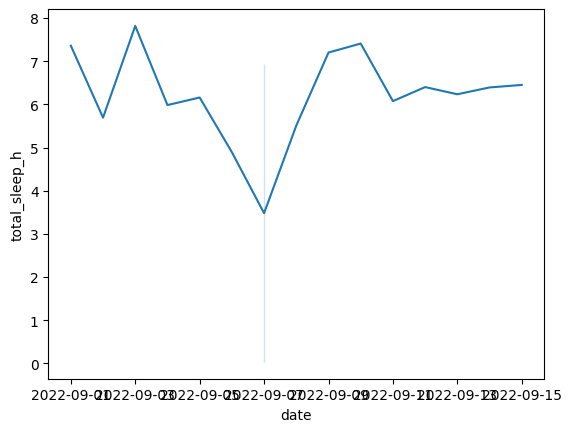

In [ ]:
import seaborn as sns
import pandas as pd
# Getting total sleep minutes from contributors

daily_sleep_seconds=[(d['day'],d['total_sleep_duration']) for d in daily_sleep_data]
daily_sleep_seconds

daily_sleep_df=pd.DataFrame(daily_sleep_seconds,columns=['date','total_sleep_s'])
daily_sleep_df['total_sleep_h']=daily_sleep_df.total_sleep_s/3600
daily_sleep_df['date'] = pd.to_datetime(daily_sleep_df.date)
sns.lineplot(data=daily_sleep_df,x='date',y='total_sleep_h')